In [1]:
%run ../setup_notebook.ipynb

import plotting_functions as pf
import analysis_functions as af
import swap_sign_RBM as ssrbm

/home/thijs/.conda/envs/py37/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/thijs/repos/dnp-code/PGM3_correct/source/numba_utilities.py:1109: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dmean_v_dw = np.dot(s1.T, V)
/home/thijs/repos/dnp-code/PGM3_correct/source/numba_utilities.py:1110: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dvar_e_dw = np.dot(s2.T, V)
/home/thijs/repos/dnp-code/PGM3_correct/source/numba_utilities.py:1111: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  tmp3 = np.dot(s3.T, V)
/home/thijs/repos/dnp-code/PGM3_correct/source/numba_utilities.py:946: NumbaPerformanceWar

/home/thijs/repos/dnp-code/rbm_pipeline_functions.py


/home/thijs/.conda/envs/py37/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
baseline with shape (5553, 54334) is not recognized, so it cannot be loaded.
drifts with shape (5553, 2) is not recognized, so it cannot be loaded.
inferredspikes with shape (5553, 54334) is not recognized, so it cannot be loaded.
ljpcoordinates with shape (3, 54334) is not recognized, so it cannot be loaded.
segmentation with shape (30, 598, 1280) is not recognized, so it cannot be loaded.
temporalmean with shape (30, 598, 1280) is not recognized, so it cannot be loaded.
rawsignal with shape (5553, 54334) is not recognized, so it cannot be loaded.
trace with shape (5553, 1) is not recognized, so it cannot be loaded.
metadata with shape (1, 1) is not recognized, so it cannot be loaded.


Recording from /home/thijs/Desktop/zf_rbm_essentials/20180912_Run01_spontaneous_rbm2.h5
len test inds 1665


In [2]:
## spike raster
save_fig = False
plot_labels = False
plot_ref = True
freq = 1 / np.mean(np.diff(rec.time))

n_neurons = 500
time_slice = slice(1450, 1900)
# random_neurons = np.random.choice(a=test_data['wb'].shape[0], size=n_neurons, replace=False)
raster_data = train_data['wb'][random_neurons, time_slice]
n_times = raster_data.shape[1]

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.imshow(raster_data, aspect='auto', cmap='Greys', origin='lower')

if plot_labels:
    ax.set_xticks([x * int(20 * freq) for x in range(4)])
    ax.set_xticklabels((np.round(ax.get_xticks() / freq)).astype('int'),
                              rotation=0)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Neurons')
else:
    if plot_ref and i_mu == 2:
        ax.set_xticks([int(10* freq), int(40 * freq)])
        ax.set_xticklabels(['', ''])
    else:
        ax.set_xticks([])
    ax.set_yticks([])
if save_fig:
    plt.savefig('/home/thijs/repos/zf-rbm/figures/figure_intro/spike_raster.svg', bbox_to_inches='tight')

NameError: name 'random_neurons' is not defined

In [10]:
# rbm_path = '/media/thijs/hooghoudt/new_sweep_april20/RBM_sweep_reruns/RBM3_20180912-Run01-spontaneous-rbm2_wb_test-segs-267-nseg10_M200_l1-2e-02_duration208093s_timestamp2020-05-16-0844.data'
rbm_path = '/media/thijs/hooghoudt/new_sweep_april20/RBM_sweep_combined/RBM3_20180912-Run01-spontaneous-rbm2_wb_test-segs-267-nseg10_M60_l1-2e-01_duration170183s_timestamp2020-04-28-0607.data'
hu_assert = [1,  11,  12,  19,  30,  36,  37,  38,  41,  43,  52,  55,  67, 68,  70,  72,  88,  94,  95,  99, 100, 107, 111, 117, 118, 120, 124, 128, 133, 136, 138, 140, 151, 152, 167, 170, 171, 172, 175, 177, 181, 186, 188, 191, 198]  # HUs that sholud be swapped
tmp_RBM = pickle.load(open(rbm_path, 'rb'))
RBM = ssrbm.swap_sign_RBM(RBM=tmp_RBM, verbose=2, assert_hu_inds=None)#hu_assert)

hu_act_test = np.transpose(RBM.mean_hiddens(test_data['wb'].T))
ol, _ = af.opt_leaf(hu_act_test)
hu_act_test_remap = hu_act_test[ol, :]

hu_act_train = np.transpose(RBM.mean_hiddens(train_data['wb'].T))
hu_act_train_remap = hu_act_train[ol, :]

32/60 HU weights are flipped
Flipped HUs are: (array([ 0,  2,  5,  7,  9, 10, 12, 14, 15, 18, 19, 20, 22, 24, 27, 31, 32,
       33, 34, 35, 37, 38, 41, 42, 43, 46, 47, 48, 51, 53, 54, 57]),)


/home/thijs/repos/dnp-code/PGM3_correct/source/layer.py:1152: RuntimeWarning: invalid value encountered in true_divide
  ) / (etg_plus / np.sqrt(self._gamma_plus)))


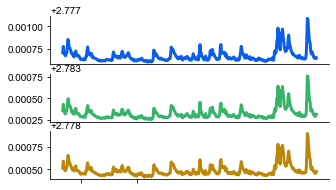

In [14]:
## HU activity
## spike raster
save_fig = False
plot_labels = False
plot_ref = True
freq = 1 / np.mean(np.diff(rec.time))

# hu_inds = [78, 3, 70]
hu_inds = [ 10, 22, 34]
hu_colours = ['#0b5eeb', '#36b469', '#bd870a']
time_slice = slice(1450, 1900)

fig, ax = plt.subplots(3, 1, figsize=(5, 3))


for i_mu, mu in enumerate(hu_inds):
    ax[i_mu].plot(hu_act_train_remap[mu, :][time_slice], linewidth=3, c=hu_colours[i_mu])

    if plot_labels:
        ax[i_mu].set_xticks([x * int(20 * freq) for x in range(4)])
        ax[i_mu].set_xticklabels((np.round(ax[i_mu].get_xticks() / freq)).astype('int'),
                                  rotation=0)
        ax[i_mu].set_xlabel('Time (s)')
        ax[i_mu].set_ylabel('HUs')
    else:
#         ax[i_mu].set_yticks([])
        if plot_ref and i_mu == 2:
            ax[i_mu].set_xticks([int(10* freq), int(40 * freq)])
            ax[i_mu].set_xticklabels(['', ''])
        else:
            ax[i_mu].set_xticks([])
    ax[i_mu].spines['top'].set_visible(False)
    ax[i_mu].spines['right'].set_visible(False)
if save_fig:
    plt.savefig('/home/thijs/repos/zf-rbm/figures/figure_intro/hu_activity_example.svg', bbox_to_inches='tight')

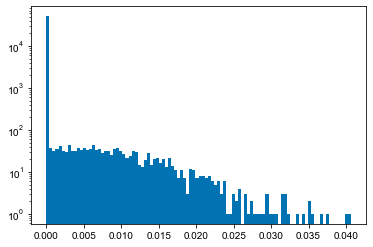

In [19]:
plt.hist(RBM.weights.mean(0), bins=100);
plt.yscale('log')

In [22]:
hu_act_test.mean(1)

array([ 0.25346446,  2.7778418 ,  2.7700093 ,  2.7776706 ,  0.4067093 ,
        2.7785208 ,  2.7764804 ,  2.7850354 ,  2.7785335 , -0.01498086,
       -0.31235513,  2.7786634 ,  2.7792227 , -0.07898322,  2.7780569 ,
       -0.16016   ,  2.780494  ,  0.20397502,  0.45809177,  2.7793262 ,
        2.7775376 ,  2.7797914 ,  0.3588174 ,  0.31682244,  0.2615192 ,
        2.7788126 ,  0.4016654 ,  2.7790997 ,  2.7771564 ,  2.7791438 ,
        0.2933906 ,  2.7784843 ,  2.7829313 ,  2.7794945 ,  2.7777927 ,
       -0.07862755,  2.775866  ,  2.7781825 ,  2.7788165 ,  2.77831   ,
        2.7753599 ,  2.7780778 ,  2.7783263 , -0.09123427,  2.7775397 ,
        2.7775743 ,  2.778988  ,  2.777949  ,  2.778342  ,  2.778454  ,
        2.7790089 ,  0.23800968,  2.7833068 ,  2.7780318 ,  2.7777262 ,
        2.7798772 ,  2.7770905 ,  2.7771056 ,  2.7794943 ,  2.7778401 ],
      dtype=float32)

[27760]


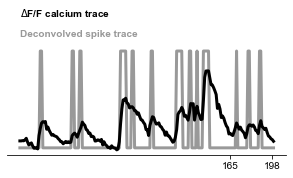

In [11]:
## convolution
save_fig = True
freq = 1 / np.mean(np.diff(rec.time))
possible_neurons = np.where(full_data['wb'].sum(1) > 500)[0]
# len(possible_neurons)
i_neurons = np.random.choice(a=possible_neurons, size=3, replace=False)
i_neurons[0] = 34729
i_neurons[1] = 46213
i_neurons[2] = 27760

i_neurons = [27760]
print(i_neurons)
time_ex = slice(1450, 1650)
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
ax = [ax]
time_bar_length_s = 15
time_bar_length_f = int(time_bar_length_s * freq)
for i_plot, i_n in enumerate(i_neurons):
    full_i_n = inds_wb[i_n]
    ax[i_plot].plot(rec.spikes[full_i_n, :][time_ex], c='k', alpha=0.4)
    ax[i_plot].plot(rec.df[full_i_n, :][time_ex], c='k')
    ax[i_plot].plot()
    ax[i_plot].set_xticks([int(50* freq), int(60 * freq)])
    ax[i_plot].set_yticks([])
    for ax_name in ['top', 'right', 'left']:
        ax[i_plot].spines[ax_name].set_visible(False)
    
ax[0].text(s='$\Delta$F/F calcium trace', x=0, y=1.35, 
           fontdict={'weight': 'bold', 'c':'k'})
ax[0].text(s='Deconvolved spike trace', x=0, y=1.15, 
           fontdict={'weight': 'bold', 'c':'k', 'alpha': 0.4})

if save_fig:
    plt.savefig('/home/thijs/repos/zf-rbm/figures/figure_intro/deconvolved_spikes.svg', bbox_to_inches='tight')

In [4]:

int(30 * freq)

99